# LGMVIP Data Science Internship January 2022

# Task 6 - Prediction using Decision Tree  Algorithm 

# Author - Param Chordiya

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Iris.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
print(X_train)

[[6.20e+01 5.90e+00 3.00e+00 4.20e+00 1.50e+00]
 [9.30e+01 5.80e+00 2.60e+00 4.00e+00 1.20e+00]
 [1.13e+02 6.80e+00 3.00e+00 5.50e+00 2.10e+00]
 [3.00e+00 4.70e+00 3.20e+00 1.30e+00 2.00e-01]
 [1.42e+02 6.90e+00 3.10e+00 5.10e+00 2.30e+00]
 [4.40e+01 5.00e+00 3.50e+00 1.60e+00 6.00e-01]
 [1.10e+01 5.40e+00 3.70e+00 1.50e+00 2.00e-01]
 [6.10e+01 5.00e+00 2.00e+00 3.50e+00 1.00e+00]
 [1.17e+02 6.50e+00 3.00e+00 5.50e+00 1.80e+00]
 [1.45e+02 6.70e+00 3.30e+00 5.70e+00 2.50e+00]
 [1.20e+02 6.00e+00 2.20e+00 5.00e+00 1.50e+00]
 [1.09e+02 6.70e+00 2.50e+00 5.80e+00 1.80e+00]
 [7.00e+01 5.60e+00 2.50e+00 3.90e+00 1.10e+00]
 [1.36e+02 7.70e+00 3.00e+00 6.10e+00 2.30e+00]
 [5.70e+01 6.30e+00 3.30e+00 4.70e+00 1.60e+00]
 [8.10e+01 5.50e+00 2.40e+00 3.80e+00 1.10e+00]
 [1.24e+02 6.30e+00 2.70e+00 4.90e+00 1.80e+00]
 [1.34e+02 6.30e+00 2.80e+00 5.10e+00 1.50e+00]
 [1.07e+02 4.90e+00 2.50e+00 4.50e+00 1.70e+00]
 [1.47e+02 6.30e+00 2.50e+00 5.00e+00 1.90e+00]
 [5.10e+01 7.00e+00 3.20e+00 4.70e+00 1.

In [5]:
print(y_train)

['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'

In [6]:
print(X_test)

[[1.15e+02 5.80e+00 2.80e+00 5.10e+00 2.40e+00]
 [6.30e+01 6.00e+00 2.20e+00 4.00e+00 1.00e+00]
 [3.40e+01 5.50e+00 4.20e+00 1.40e+00 2.00e-01]
 [1.08e+02 7.30e+00 2.90e+00 6.30e+00 1.80e+00]
 [8.00e+00 5.00e+00 3.40e+00 1.50e+00 2.00e-01]
 [1.01e+02 6.30e+00 3.30e+00 6.00e+00 2.50e+00]
 [4.10e+01 5.00e+00 3.50e+00 1.30e+00 3.00e-01]
 [8.70e+01 6.70e+00 3.10e+00 4.70e+00 1.50e+00]
 [7.70e+01 6.80e+00 2.80e+00 4.80e+00 1.40e+00]
 [7.20e+01 6.10e+00 2.80e+00 4.00e+00 1.30e+00]
 [1.35e+02 6.10e+00 2.60e+00 5.60e+00 1.40e+00]
 [5.20e+01 6.40e+00 3.20e+00 4.50e+00 1.50e+00]
 [7.40e+01 6.10e+00 2.80e+00 4.70e+00 1.20e+00]
 [5.50e+01 6.50e+00 2.80e+00 4.60e+00 1.50e+00]
 [6.40e+01 6.10e+00 2.90e+00 4.70e+00 1.40e+00]
 [3.80e+01 4.90e+00 3.10e+00 1.50e+00 1.00e-01]
 [7.90e+01 6.00e+00 2.90e+00 4.50e+00 1.50e+00]
 [9.10e+01 5.50e+00 2.60e+00 4.40e+00 1.20e+00]
 [4.60e+01 4.80e+00 3.00e+00 1.40e+00 3.00e-01]
 [1.70e+01 5.40e+00 3.90e+00 1.30e+00 4.00e-01]
 [1.22e+02 5.60e+00 2.80e+00 4.90e+00 2.

In [7]:
print(y_test)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor']


## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train)

[[-3.41283725e-01  1.54399532e-02 -1.19254753e-01  2.25126850e-01
   3.56381749e-01]
 [ 3.50852428e-01 -9.98450310e-02 -1.04039491e+00  1.13559562e-01
  -2.86480506e-02]
 [ 7.97391882e-01  1.05300481e+00 -1.19254753e-01  9.50314227e-01
   1.12644135e+00]
 [-1.65857511e+00 -1.36797986e+00  3.41315328e-01 -1.39259884e+00
  -1.31208072e+00]
 [ 1.44487409e+00  1.16828980e+00  1.11030287e-01  7.27179649e-01
   1.38312788e+00]
 [-7.43169234e-01 -1.02212490e+00  1.03217045e+00 -1.22524790e+00
  -7.98707650e-01]
 [-1.47995933e+00 -5.60984968e-01  1.49274053e+00 -1.28103155e+00
  -1.31208072e+00]
 [-3.63610698e-01 -1.02212490e+00 -2.42210516e+00 -1.65358660e-01
  -2.85334584e-01]
 [ 8.86699773e-01  7.07149859e-01 -1.19254753e-01  9.50314227e-01
   7.41411549e-01]
 [ 1.51185501e+00  9.37719827e-01  5.71600368e-01  1.06188152e+00
   1.63981441e+00]
 [ 9.53680691e-01  1.30724937e-01 -1.96153508e+00  6.71396005e-01
   3.56381749e-01]
 [ 7.08083991e-01  9.37719827e-01 -1.27067995e+00  1.11766516e+00

In [10]:
print(X_test)

[[ 0.84204583 -0.09984503 -0.57982483  0.72717965  1.51147115]
 [-0.31895675  0.13072494 -1.96153508  0.11355956 -0.28533458]
 [-0.96643896 -0.44569998  2.64416573 -1.33681519 -1.31208072]
 [ 0.68575702  1.62942973 -0.34953979  1.39658338  0.74141155]
 [-1.54694025 -1.0221249   0.80188541 -1.28103155 -1.31208072]
 [ 0.52946821  0.47657989  0.57160037  1.22923245  1.63981441]
 [-0.81015015 -1.0221249   1.03217045 -1.39259884 -1.18373745]
 [ 0.21689059  0.93771983  0.11103029  0.50404507  0.35638175]
 [-0.00637914  1.05300481 -0.57982483  0.55982872  0.22803848]
 [-0.118014    0.24600992 -0.57982483  0.11355956  0.09969522]
 [ 1.28858528  0.24600992 -1.04039491  1.00609787  0.22803848]
 [-0.56455345  0.59186487  0.34131533  0.39247778  0.35638175]
 [-0.07336005  0.24600992 -0.57982483  0.50404507 -0.02864805]
 [-0.49757253  0.70714986 -0.57982483  0.44826143  0.35638175]
 [-0.29662978  0.24600992 -0.34953979  0.50404507  0.22803848]
 [-0.87713107 -1.13740989  0.11103029 -1.28103155 -1.44

## Training the Decision Tree Classification model on the Training set

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

## Predicting the Test set results

In [12]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']


## Making the Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


1.0

Accuracy is 100%

## Visualising things

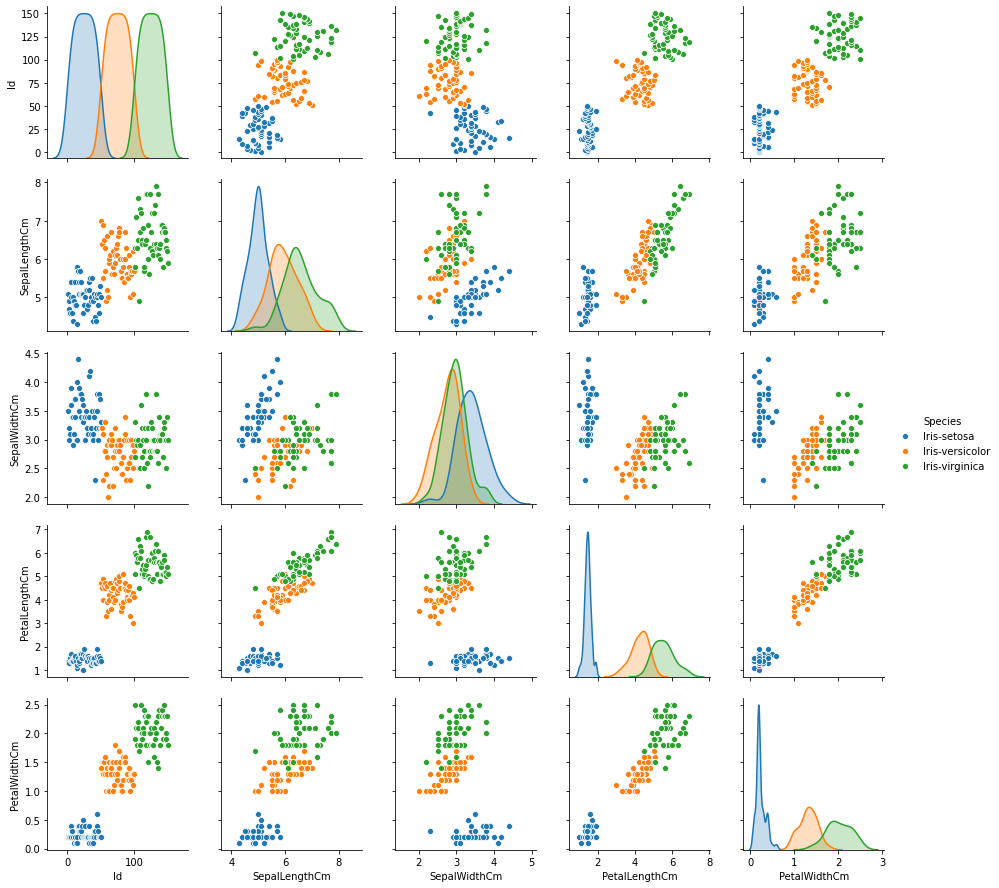

In [14]:
import seaborn as sns
sns.pairplot(data=dataset, hue='Species')
plt.show()

[Text(535.6800000000001, 453.0, 'Id <= 0.529\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]\nclass = Iris-virginica'),
 Text(357.12, 271.8, 'PetalWidthCm <= -0.542\nentropy = 0.999\nsamples = 71\nvalue = [37, 34, 0]\nclass = Iris-setosa'),
 Text(178.56, 90.59999999999997, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = Iris-setosa'),
 Text(535.6800000000001, 90.59999999999997, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris-versicolor'),
 Text(714.24, 271.8, 'entropy = 0.0\nsamples = 41\nvalue = [0, 0, 41]\nclass = Iris-virginica')]

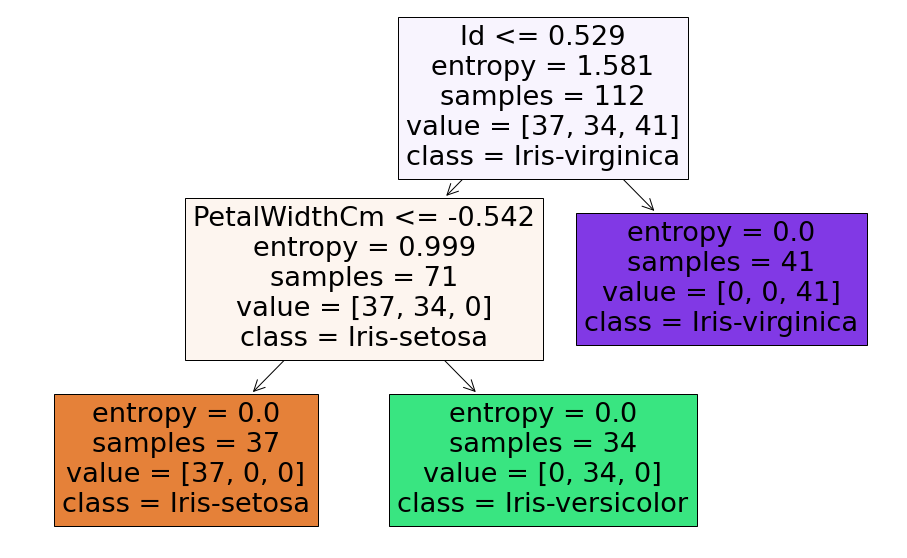

In [15]:
col = dataset.columns[:-1]
classes = dataset['Species'].unique().tolist()
from sklearn.tree import plot_tree
plt.figure(figsize=(16,10))
plot_tree(classifier, feature_names=col, class_names=classes,  filled=True)